# Heart Disease Prediction using Machine learning

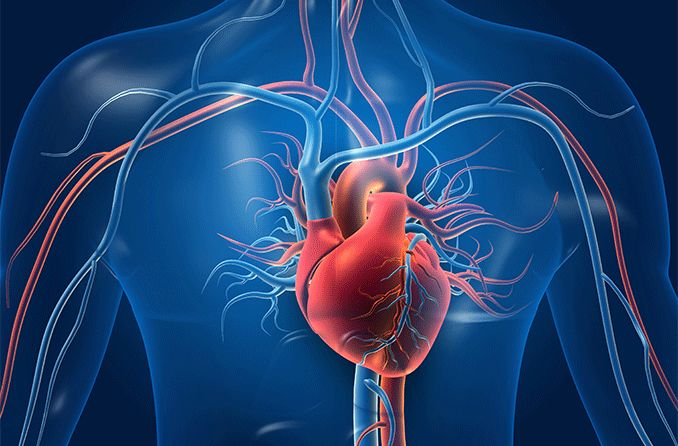

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)


In [1]:
#Multiple Model Test = Best Modle Save (best score)

# Step 1: Import Important Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


# Step 2: Loading Data

In [3]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3: Understanding Data using EDA

###### 3.1 Data Head

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

###### 3.2 Data Tail

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

###### 3.3 Data Shape

In [6]:
df.shape

(303, 14)

###### 3.4 Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### 3.5 Data Columns

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Description
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [9]:
# Domain Knowledge is required for this level of project
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)


###### 3.7 Checking Null Values

In [10]:
df.isna().sum()
# No null values found
# In case of Null: Remove, Fill, Replace, Drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8 Column Stats

In [11]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

###### 3.9 Each Column Univariate Analysis

In [12]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('==================',end = '\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Column_sex [1 0]

Column_cp [3 2 1 0]

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

###### 3.10 Each Numerical Features Hist Plot Distribution

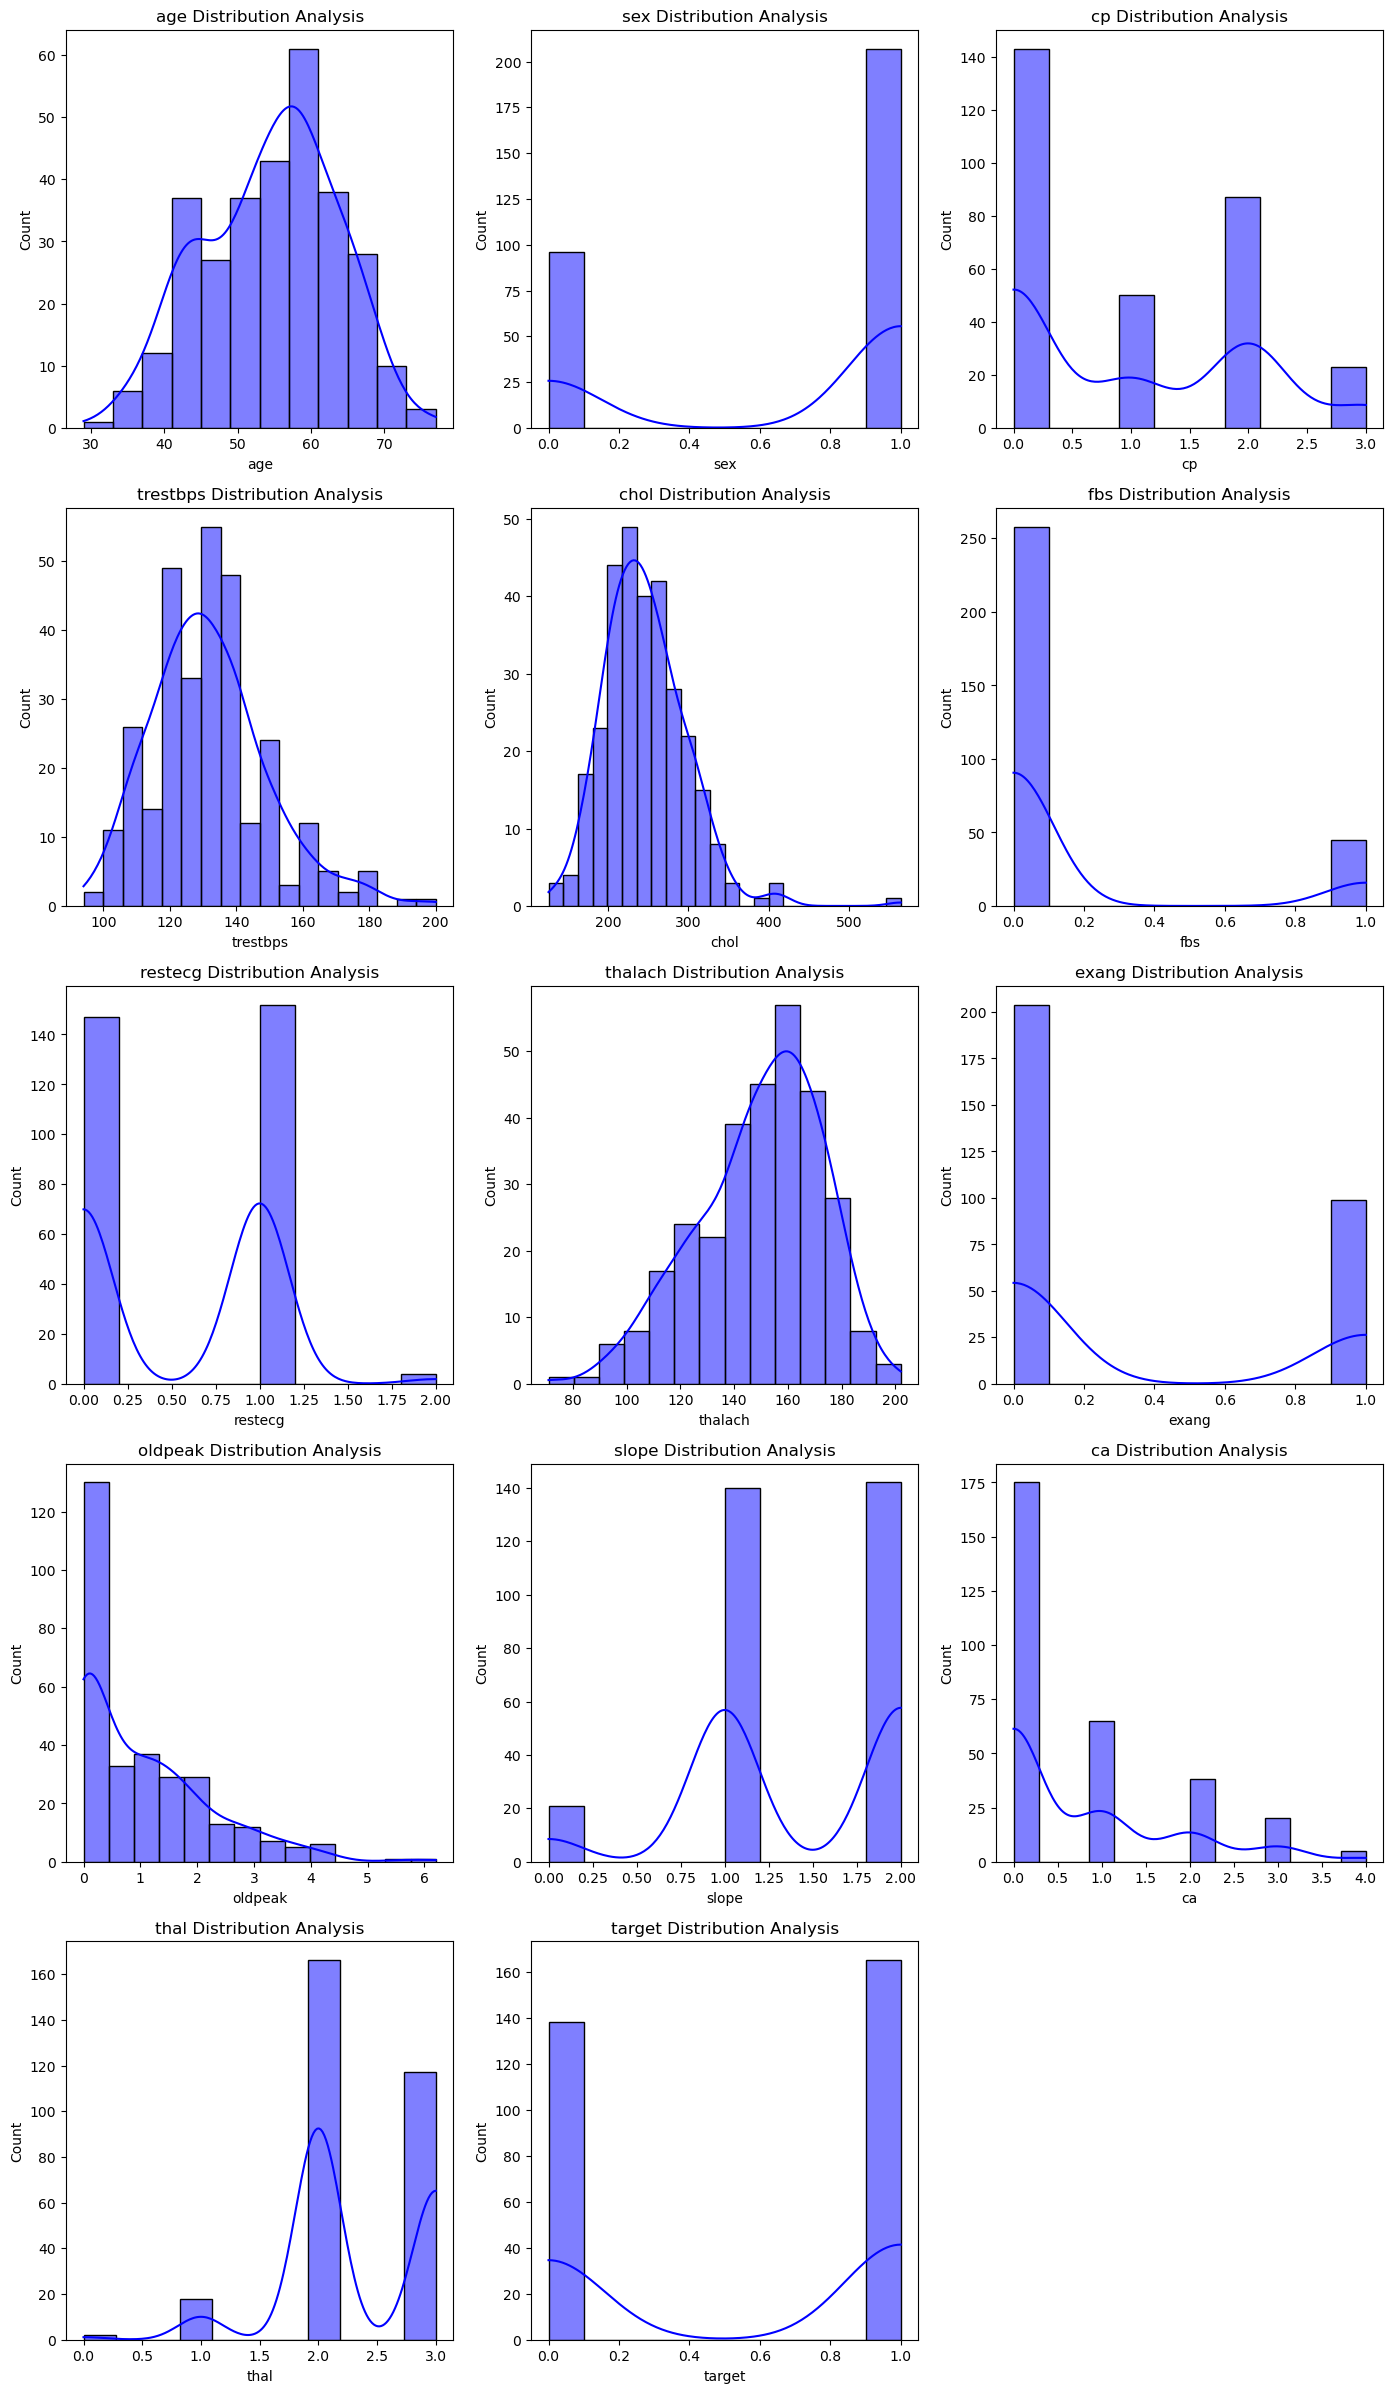

In [13]:
r = 5  #row
c = 3  #column
plt.figure(figsize = (17,30))
for i, j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis', color = 'Black')
    sns.histplot(df[j], kde = True, color = 'b')
    
plt.savefig('All Numerical Features Analysis.jpeg', dpi = 500)
plt.show()

In [14]:
# Target column not that much Imbalance,, we can proceed, if imbalance found we need to balance using Sampling

###### 3.11 Bivariate Analysis, To check Correlation of Features VS Target

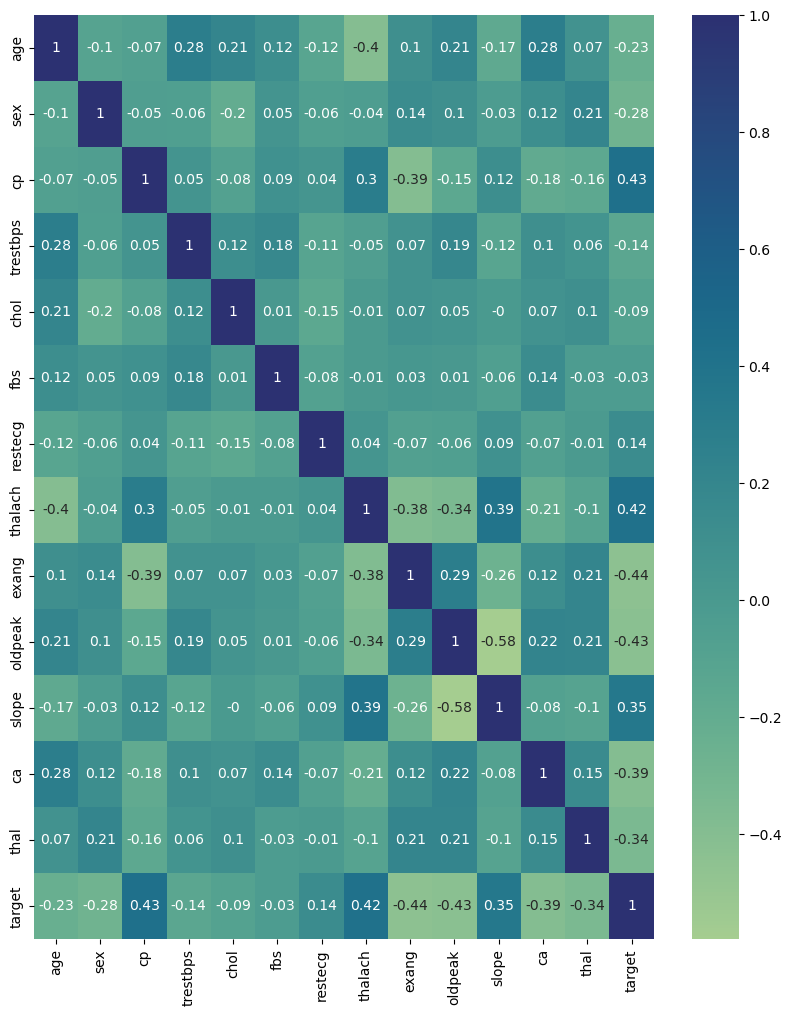

In [15]:
plt.figure(figsize = (10,12))
sns.heatmap(df.corr().round(2), cmap = 'crest', annot = True)
plt.show()

###### 3.12 Target VS Features

In [16]:
df.corr()['target'].sort_values(ascending = False).reset_index()

index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

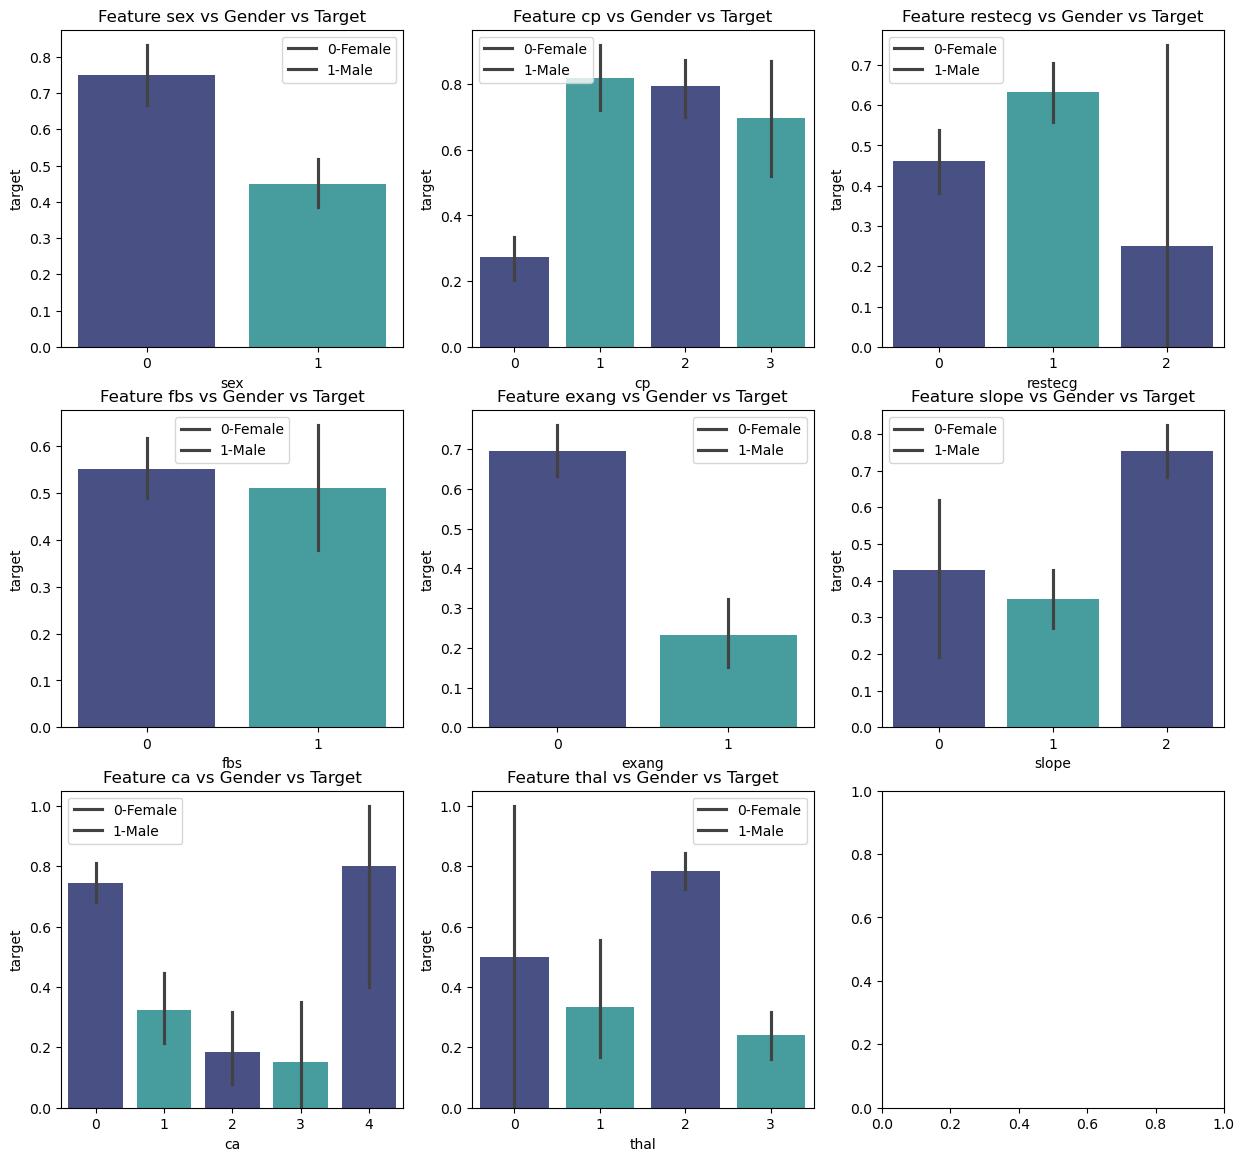

In [17]:
r = 3 #rows
c = 3 #columns

x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        ...

plt.show()

###### 3.13 Pairplot Features vs Target

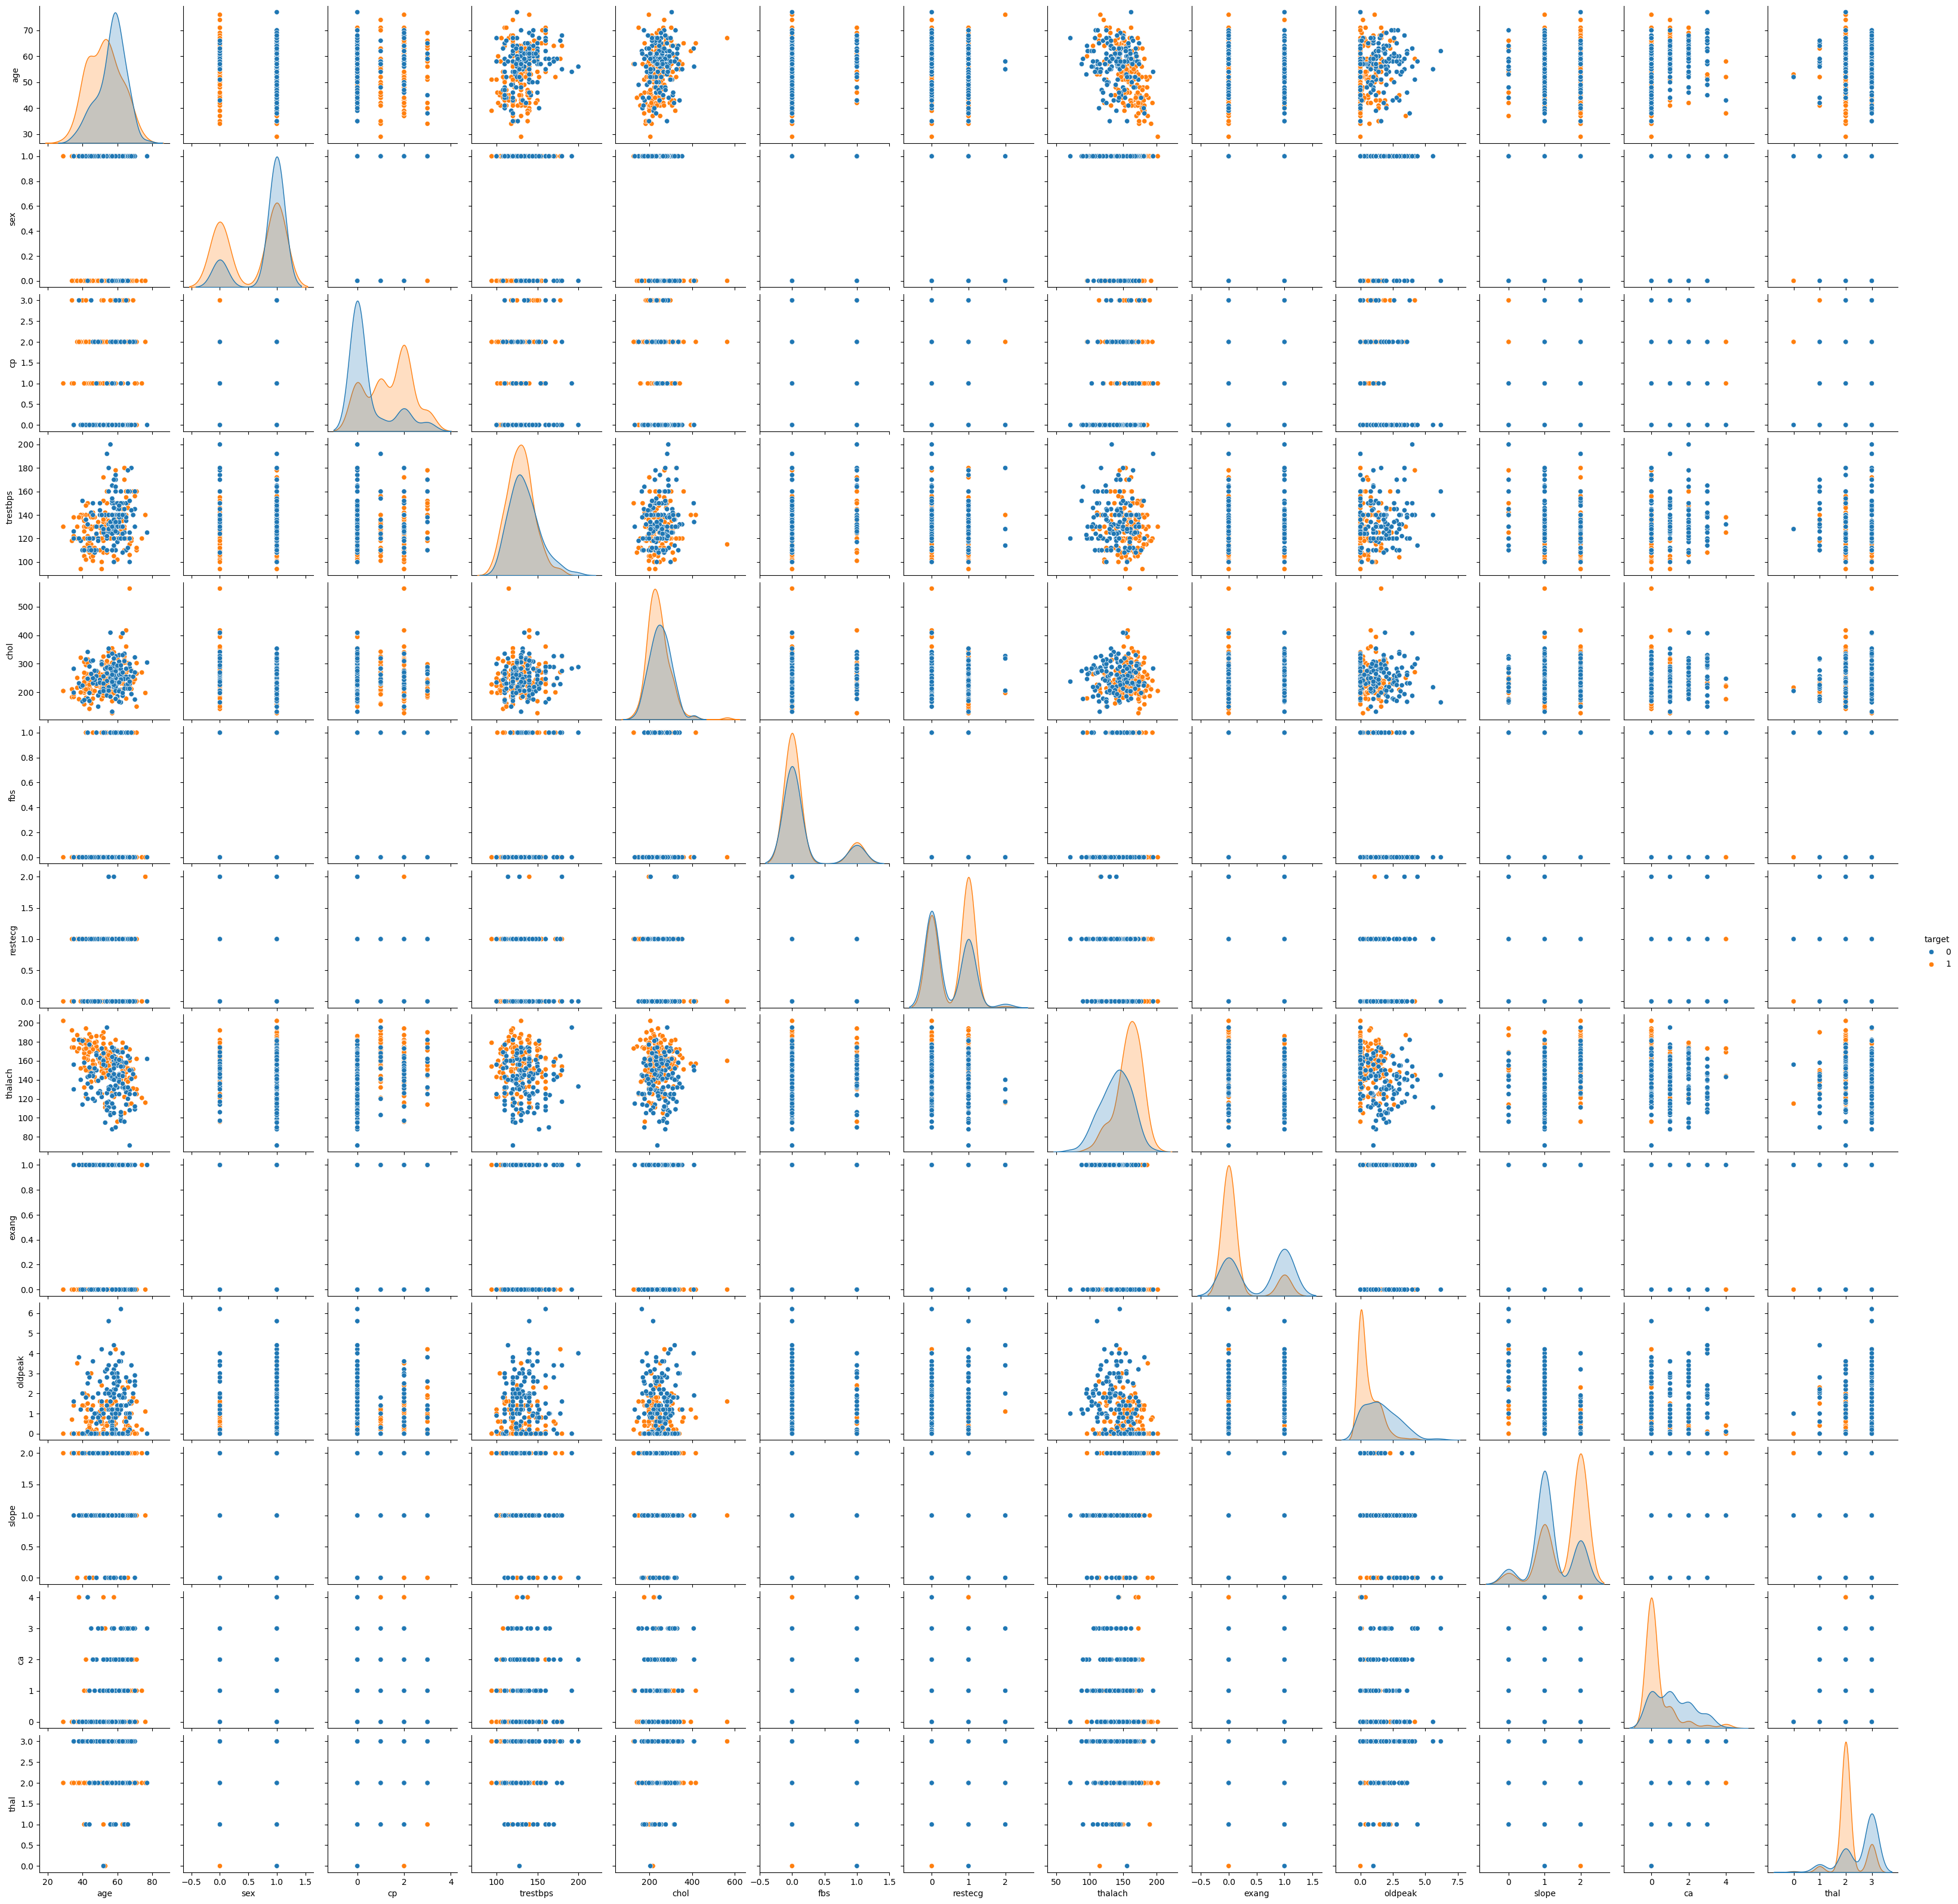

In [18]:
sns.pairplot(data = df, hue = 'target')
plt.show()

# Step 4: Divide Data into Train and Test

### Train Test Split

###### 4.1 Divide data into Target and Features

In [19]:
X = df.iloc[:,:-1]
y = df['target']

X.shape, y.shape

((303, 13), (303,))

###### 4.2 Train - test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step 5: Multi Model Creation

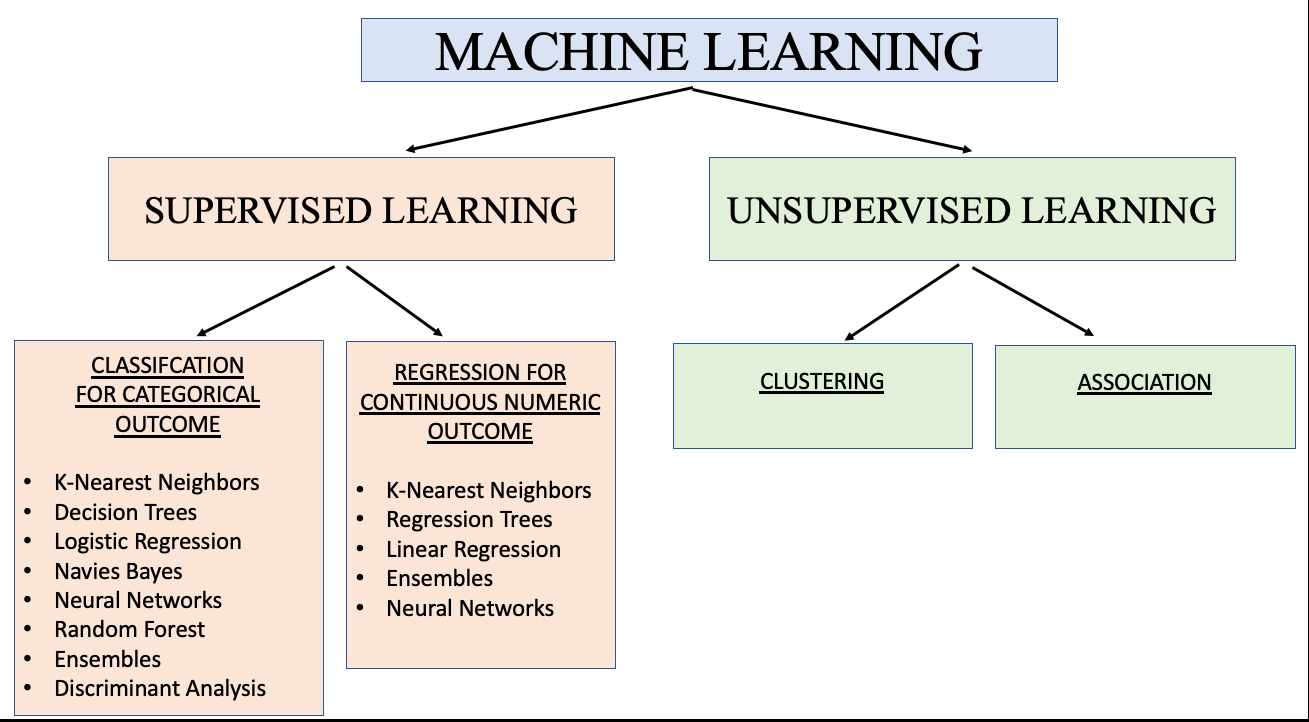

### 5.1 Logistic Regression Model

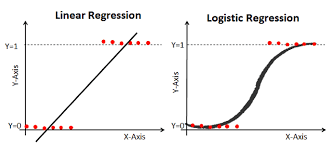

In [22]:
# # It uses the concept of Sigmoid Function: Linear points converted into Sigmoid(S) Curve
# # yPred = mx + c

# # z = y_pred

# # y_pred = Linear Regression
# # Sigmoid Function convert Linear Line 'S' Curve

# Logistic Regression: 

###### 5.1.1 Import Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()    # Model Object

model_lr.fit(X_train, y_train)     # Model Building/ Training: learns pattern

LogisticRegression()

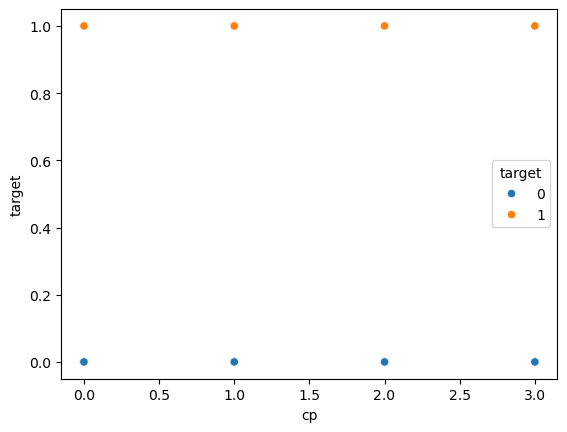

In [24]:
sns.scatterplot(data = df, x = 'cp', y = 'target', hue = 'target' )
plt.show()

In [25]:
y_pred = model_lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

###### 5.1.2 Import Model Evaluation Metrics
it will be called only when the problem is of Classification

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

###### 5.1.3 Import Confusion Matrix to Evaluate Classification Model

In [27]:
# Error Comparison if: Score Tie
# 2 Errors = Type1, Type2
# DANGEROUS ERROR: Type1 Error = FALSE POSITIVE(FP) (thats why ML engineers try that type1 error is as least as possible)

# ACTUAL|ANSWER
# 1 = positive, true
# 0 = negative, false

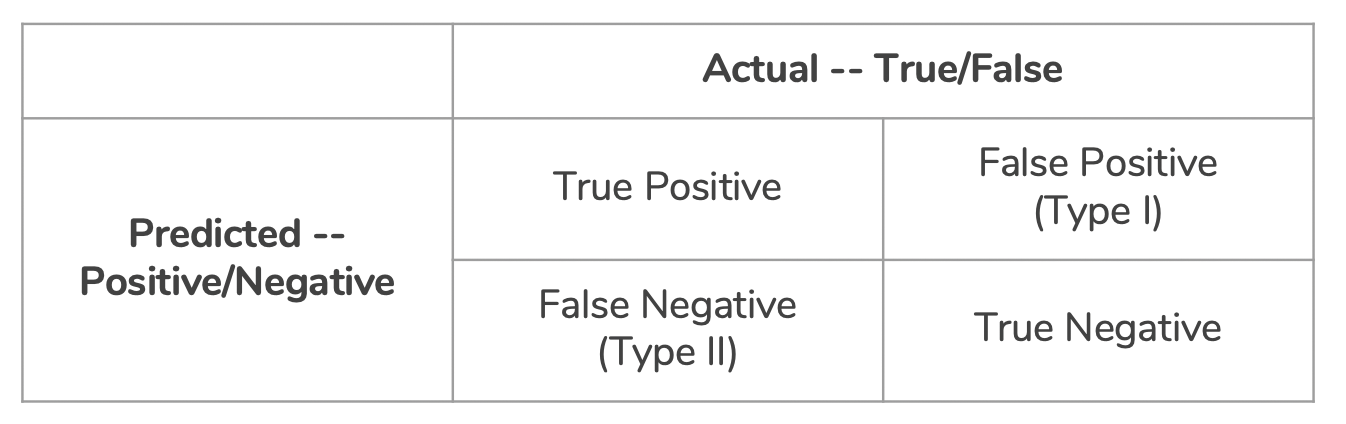

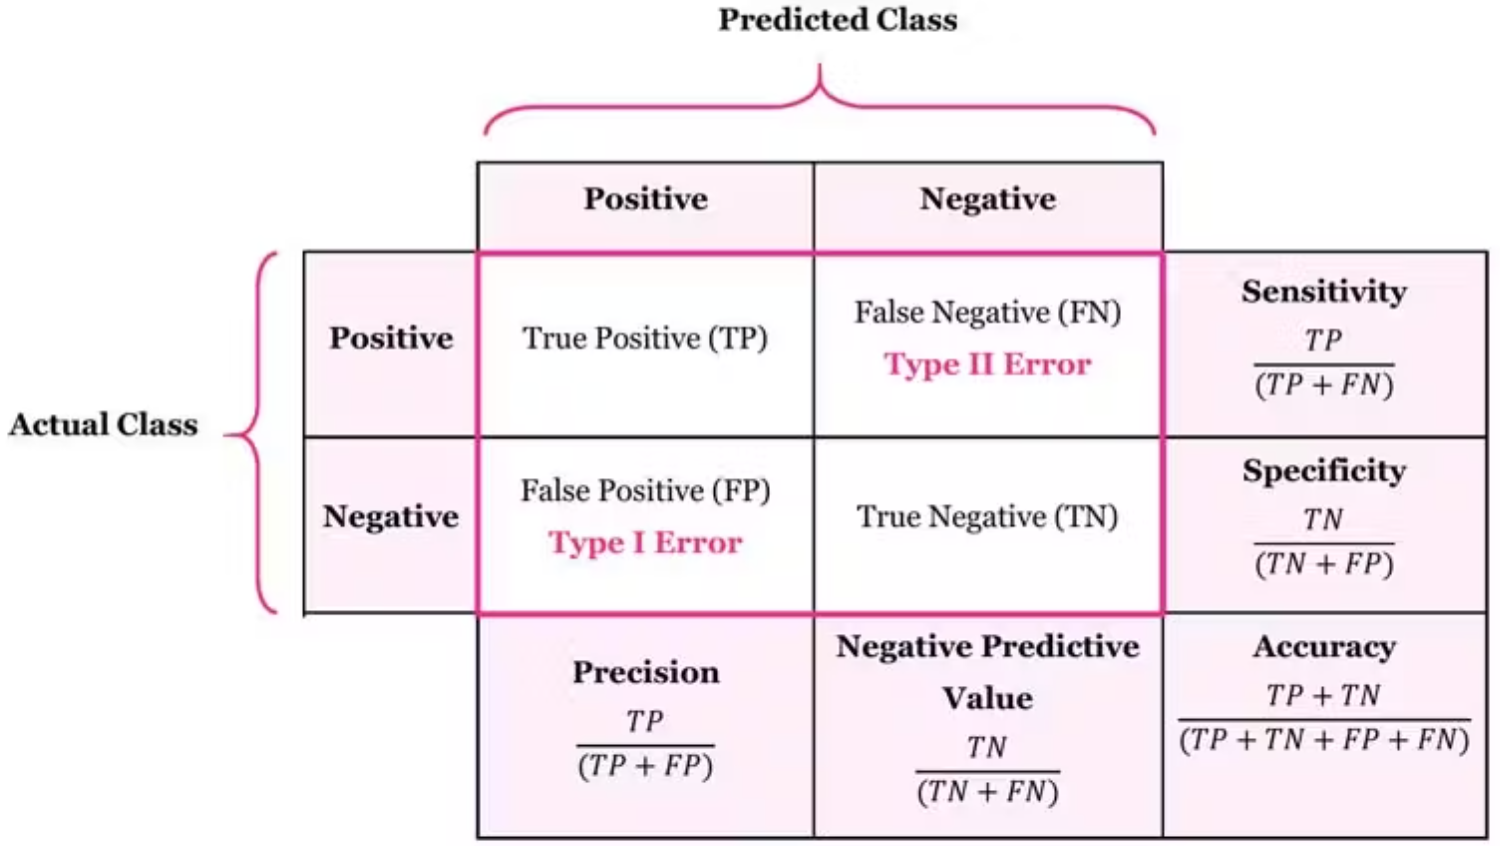

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  4]
 [ 3 29]]


Text(50.722222222222214, 0.5, 'Actual Value')

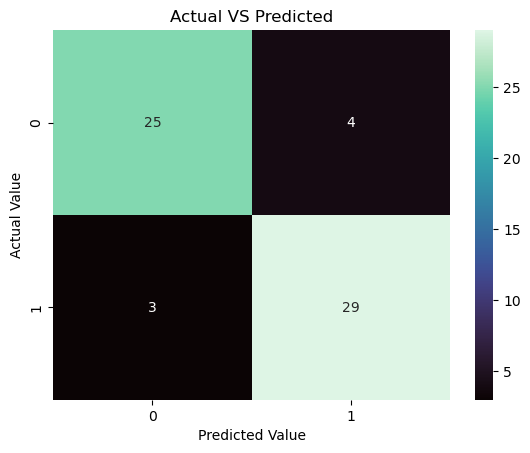

In [30]:
plt.title('Actual VS Predicted')
sns.heatmap(cm, annot = True, cmap = 'mako' )
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

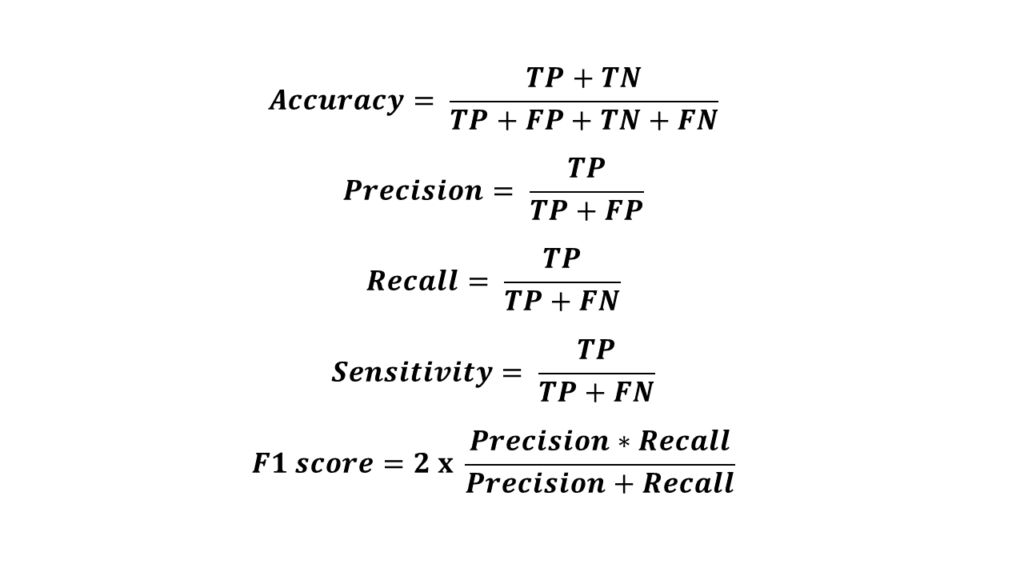

In [31]:
cm

array([[25,  4],
       [ 3, 29]])

In [32]:
cm.ravel()    #used for Sequence

array([25,  4,  3, 29])

In [33]:
TN,FP,FN,TP = cm.ravel()    

In [34]:
precision_score(y_test, y_pred)

0.8787878787878788

In [35]:
ps = TP/(TP+FP)
print(ps)

0.8787878787878788


In [36]:
acs = (TP + TN)/cm.sum()
print(acs)

0.8852459016393442


In [37]:
accuracy_score(y_test, y_pred)

0.8852459016393442

In [38]:
rs = recall_score(y_test, y_pred)
print('Recall Score is: ', rs)

Recall Score is:  0.90625


In [39]:
# F1 Score to Evaluate both Precision and Recall Score 

In [40]:
f1_sc = f1_score(y_test, y_pred)
print('F1 Score: ', f1_sc)

F1 Score:  0.8923076923076924


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###### 5.1.4 Checking Model Score
Model Score is same as Accuracy Score

In [42]:
lr_score = model_lr.score(X_test, y_test)
lr_score

0.8852459016393442

### 5.2 Naive Bayes ML Model

In [43]:
# Pre Assumption: It will assume No Correlation between features

###### 5.2.1 Import Naive Model

In [44]:
from sklearn.naive_bayes import GaussianNB
#GaussianNB will be used in the case of Binary Classification
#MultiNomialNB will be used in the case of Multi Class Classification

model_nv = GaussianNB()

model_nv.fit(X_train,y_train)  # Train part/learning

GaussianNB()

In [45]:
y_pred = model_nv.predict(X_test)

In [46]:
nv_score = model_nv.score(X_test, y_test)
print('Naive Bayes: ',nv_score)

Naive Bayes:  0.8688524590163934


In [47]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.8688524590163934
Precision Score 0.9
Recall Score 0.84375
F1 Score 0.8709677419354839


<function matplotlib.pyplot.show(close=None, block=None)>

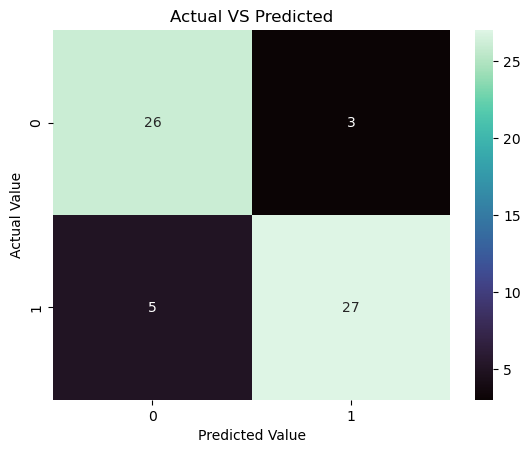

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.title('Actual VS Predicted')
sns.heatmap(cm, annot = True, cmap = 'mako' )
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [50]:
# Model 1 > Y_pred > Scores > Confusion Matrix > Classification Report
# Model 2 > Y_pred > Scores > Confusion Matrix > Classification Report
# Model 3 > Y_pred > Scores > Confusion Matrix > Classification Report
# Model 4 > Y_pred > Scores > Confusion Matrix > Classification Report
# Model 5 > Y_pred > Scores > Confusion Matrix > Classification Report
# Model 6 > Y_pred > Scores > Confusion Matrix > Classification Report
# Best Model Save: Error(Low), Accuracy Score High
# Deploy

### 5.3: Support Vector Machine ML Model

In [51]:
# SVM

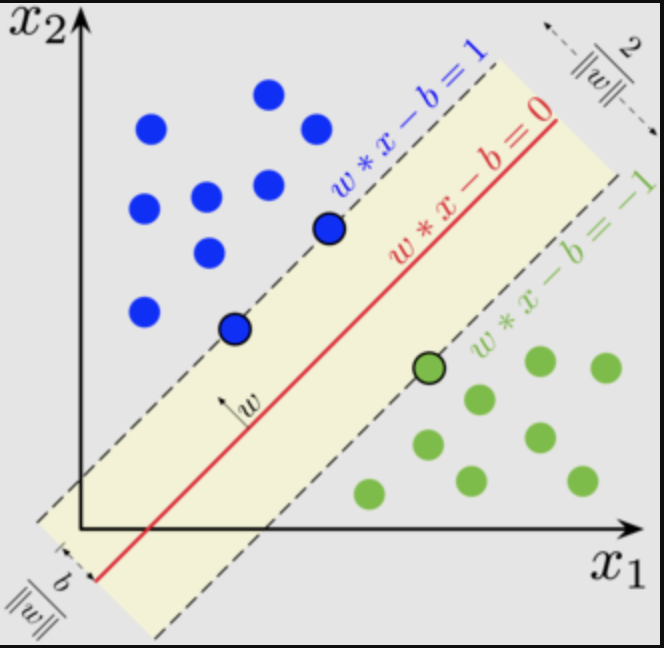

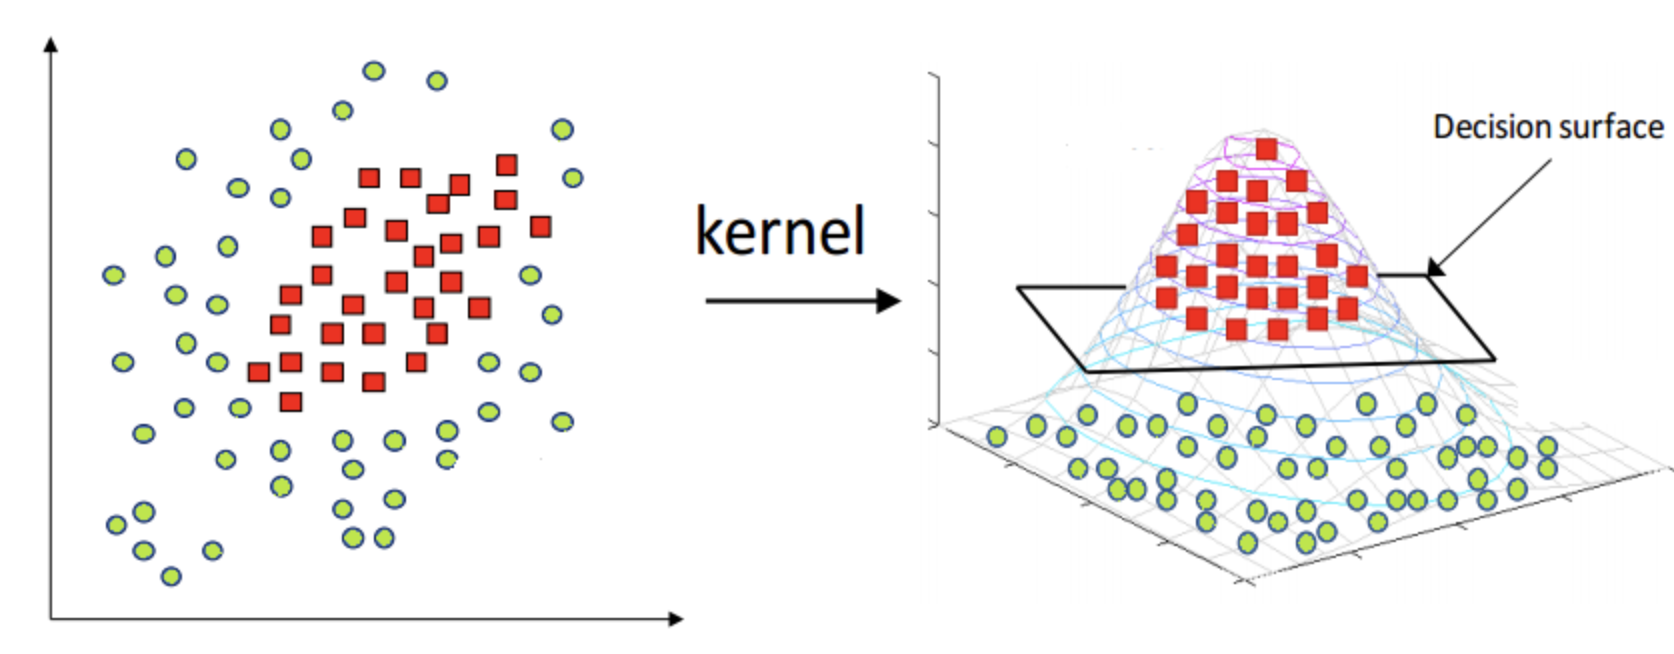

In [52]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

###### Step 5.3.1: Import Svm Module

In [53]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2: Predict X_test

In [54]:
y_pred = model_svc.predict(X_test)

###### Step 5.3.3: Checking Scores and Confusion matrix

In [55]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.7049180327868853
Precision Score 0.6666666666666666
Recall Score 0.875
F1 Score 0.7567567567567568


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



<function matplotlib.pyplot.show(close=None, block=None)>

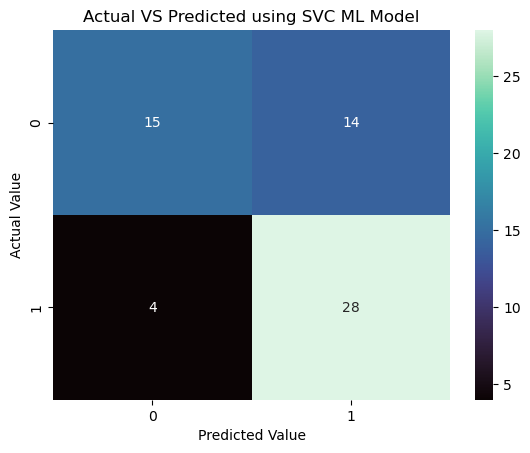

In [57]:
cm = confusion_matrix(y_test, y_pred)

plt.title('Actual VS Predicted using SVC ML Model')
sns.heatmap(cm, annot = True, cmap = 'mako' )
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show

In [58]:
svm_score = accuracy_score(y_test, y_pred)

In [59]:
lr_score,nv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

### Step 5.4: Decision Tree ML Model

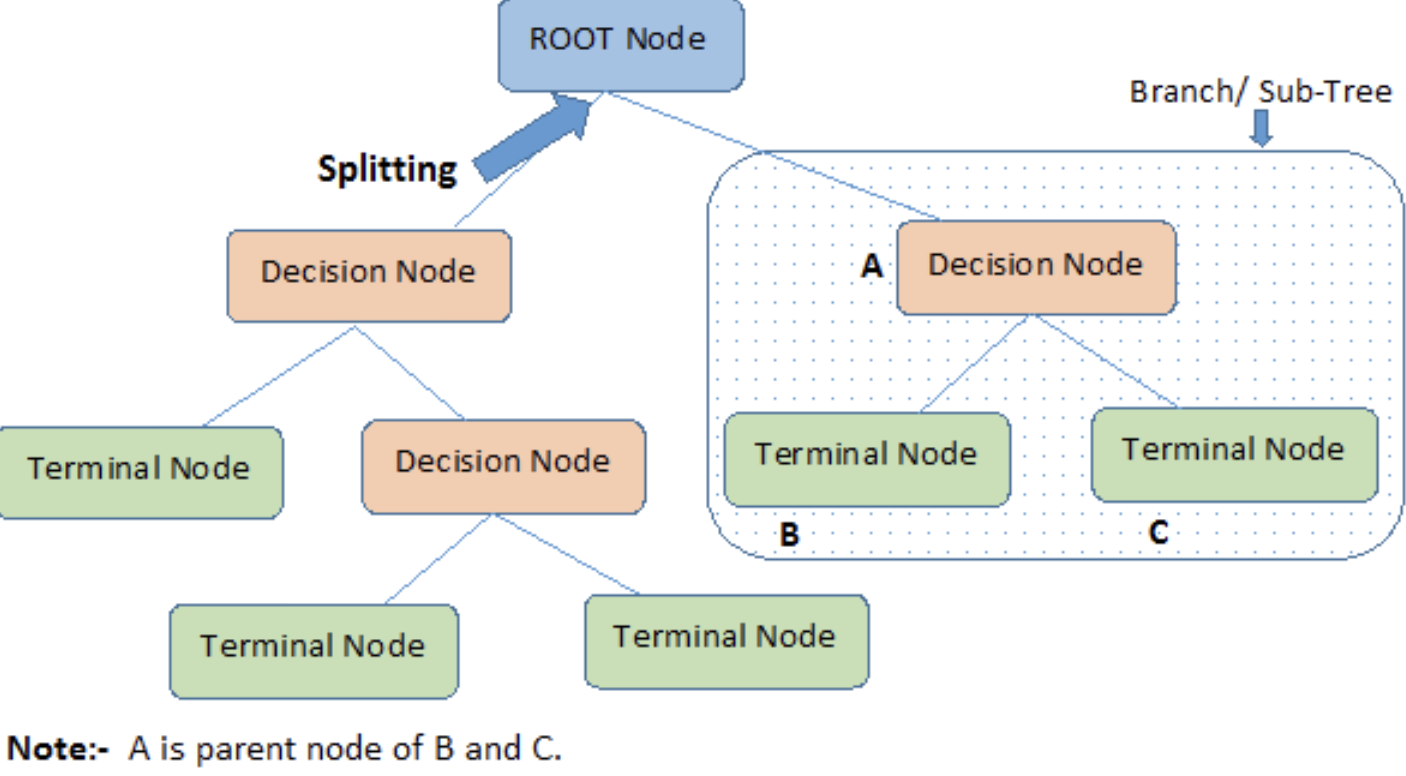

In [60]:
## Iris Flower features
# Sepal width
# Sepal length
# Petal width
# Petal length

## Iris Species
# Iris Versicolor
# Iris Setosa
# Iris Virginica

# Decision Node :
    # petal width (cm) <= 0.8
    # gini = 0.667

###### Step 5.4.1: Import Decision Tree Model

In [61]:
from  sklearn.tree import DecisionTreeClassifier

In [62]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step 5.4.2: Predict y_pred

In [63]:
y_pred = model_dt.predict(X_test)

In [64]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.8360655737704918
Precision Score 0.9230769230769231
Recall Score 0.75
F1 Score 0.8275862068965517


In [65]:
dt_score = accuracy_score(y_test, y_pred)
dt_score

0.8360655737704918

In [66]:
from sklearn.tree import plot_tree

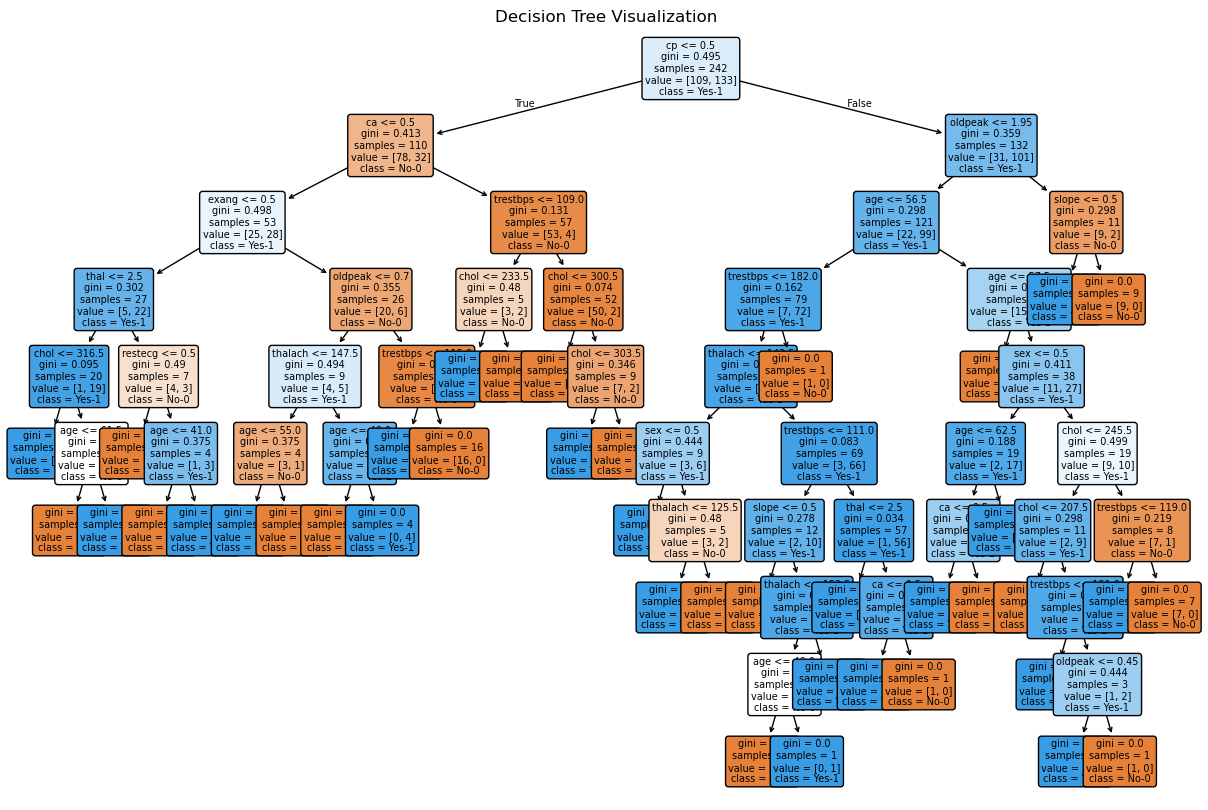

In [67]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=7) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

### Step 5.5: Ensemble ML Model
- `Bagging Technique`: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority.
- `Boosting Technique`: Next model learn from previous model and boost it minimize error to improve score

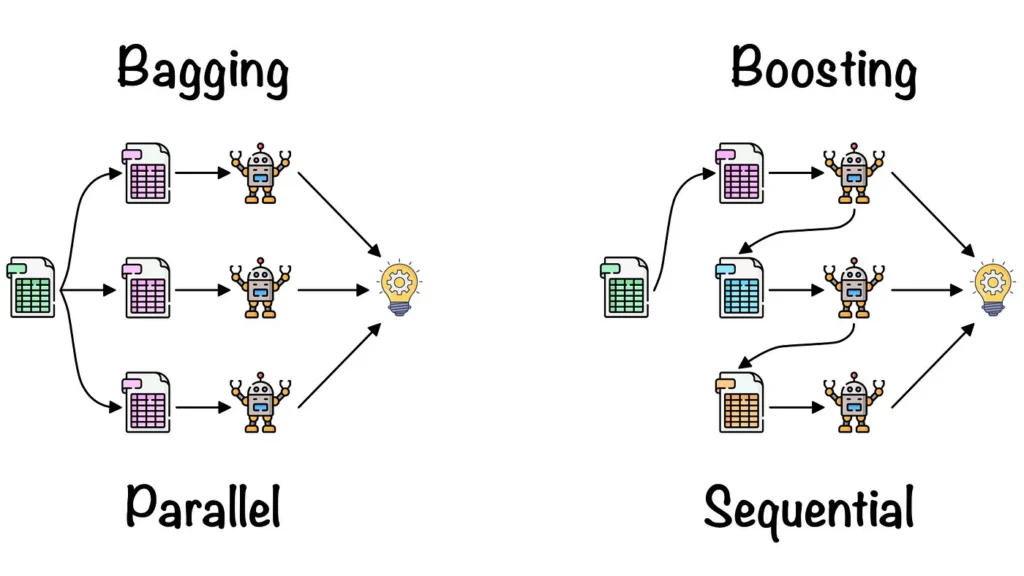

#### Step 5.5.1: Bagging Technique Model>> Random Forest ML Model

In [68]:
# Random Forest: Bags of Multiple Decision Trees Model
# Default Trees = 100
# Bagging Technique ( Ensemble )

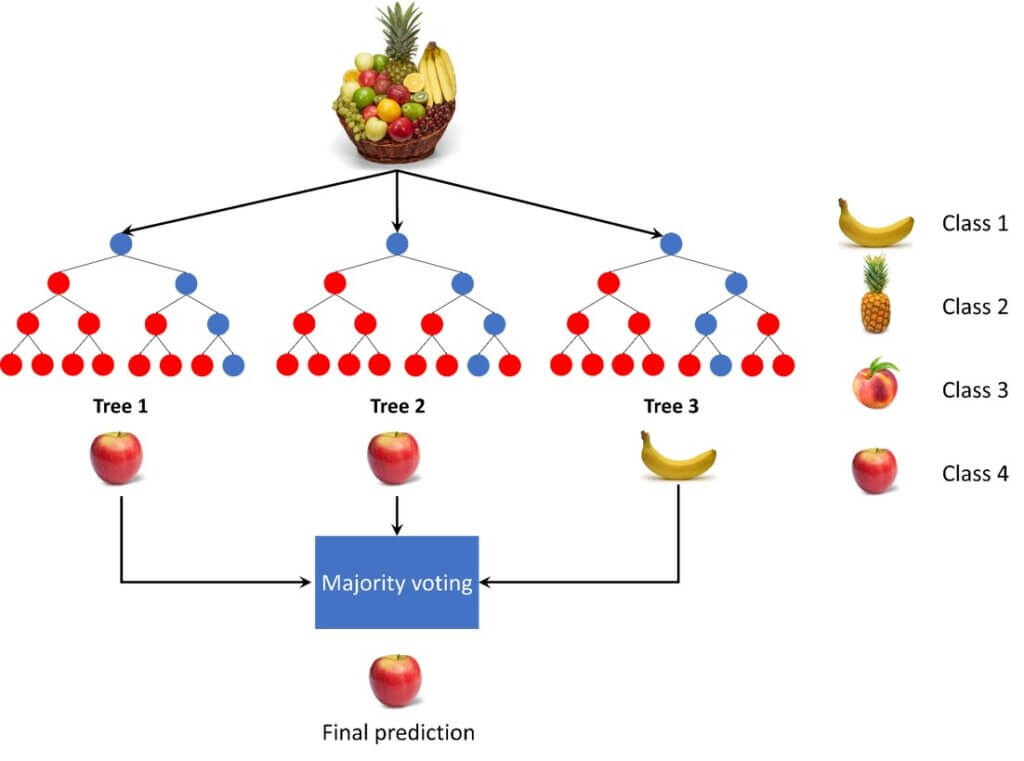

In [69]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5  >> 2.36
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

#### Step 5.5.2: Import Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators= 200)  # Parameter change Default Tree value to 200

model_rf.fit(X_train,y_train)      # Learning

RandomForestClassifier(n_estimators=200)

#### Step 5.5.3: y_pred prediction based on X_test

In [71]:
y_pred = model_rf.predict(X_test)

In [72]:
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy Score 0.8688524590163934
Precision Score 0.8529411764705882
Recall Score 0.90625
F1 Score 0.8787878787878788


In [73]:
rf_score = accuracy_score(y_test, y_pred)
rf_score

0.8688524590163934

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<function matplotlib.pyplot.show(close=None, block=None)>

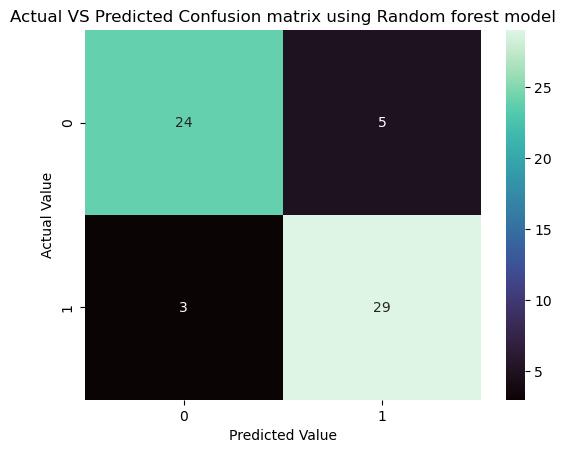

In [75]:
cm = confusion_matrix(y_test, y_pred)

plt.title('Actual VS Predicted Confusion matrix using Random forest model')
sns.heatmap(cm, annot = True, cmap = 'mako' )
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show

### Step 5.6: Ensemble Boosting technique: Adaboost, Gradientboost, XGboost

In [76]:
# Adaboost: Adaptive Boosting 
# Gradientyboost: GBM
# LBM: Gradientboosting: LGBM
# XGboost: Extreme Gradient Boosting:
# Catboost: categorical : textual data

In [77]:
# XGboost: Extreme Gradient Boosting:

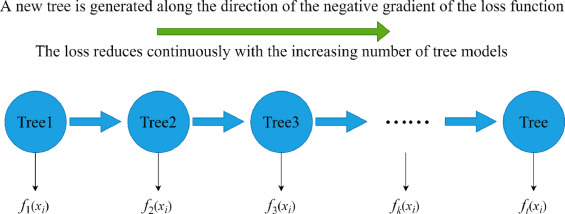

#### Step 5.6.1: Import XGboost ML Algorithm

In [78]:
# pip install xgboost

In [79]:
import xgboost
print('Done')

Done


In [80]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()      # Hyperparameters: Model Fine tune  objective="binary:logistic", random_state=42, learning_rate = 0.001
model_xgb.fit(X_train,y_train)   # NONE: Hyperparameters: Model Fine tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
y_pred = model_xgb.predict(X_test)

In [82]:
xgb_score = accuracy_score(y_test, y_pred)
xgb_score

0.819672131147541

### Step 5.7:  KNN: Regrtession and Classification

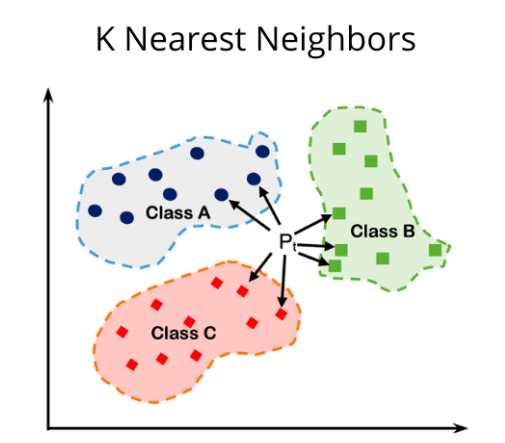!

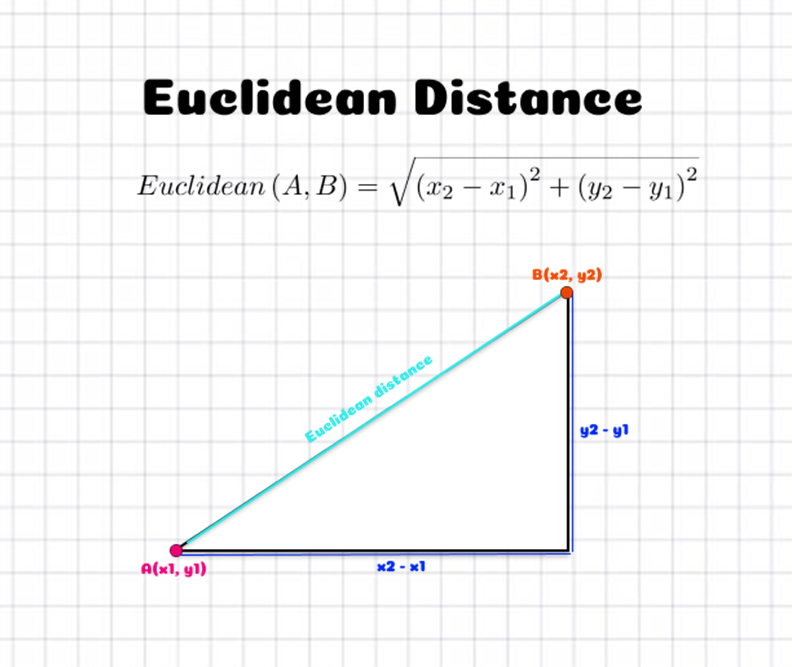

#### Step 5.7.1: Import KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
model_knn =KNeighborsClassifier(n_neighbors=14)  # k =14

model_knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=14)

In [85]:
y_pred = model_knn.predict(X_test)

In [86]:
knn_score = accuracy_score(y_test, y_pred)
knn_score

0.7377049180327869

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



<function matplotlib.pyplot.show(close=None, block=None)>

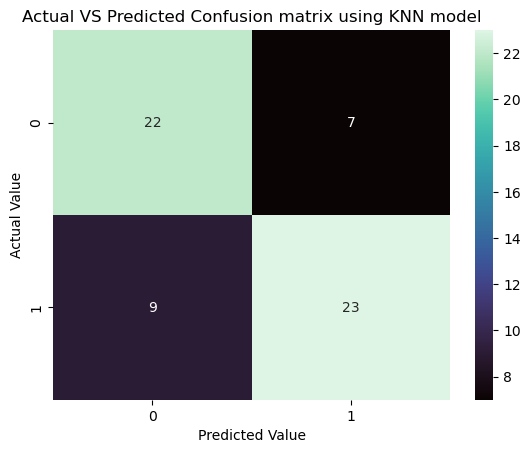

In [88]:
cm = confusion_matrix(y_test, y_pred)

plt.title('Actual VS Predicted Confusion matrix using KNN model')
sns.heatmap(cm, annot = True, cmap = 'mako' )
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show

### Step 5.8: Artificial Neural Network using Deep learning

In [89]:
# ML works only on Limited data
# If Input Change ML Model fail(8 Features col:8)

In [90]:
# Deep learning: dens(Deep) Neural Network: trained on Multiple possibilities

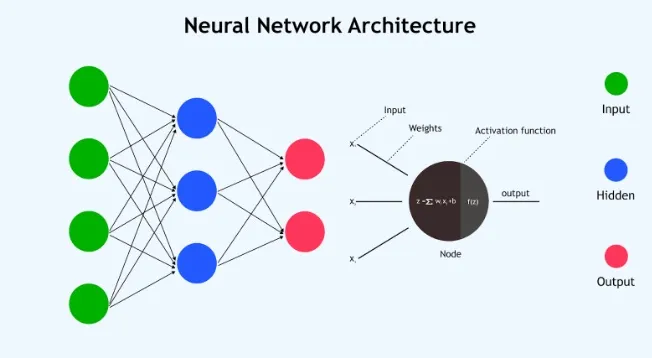

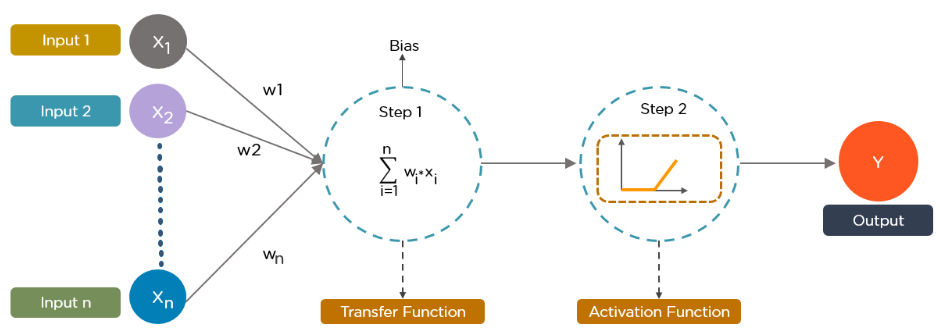

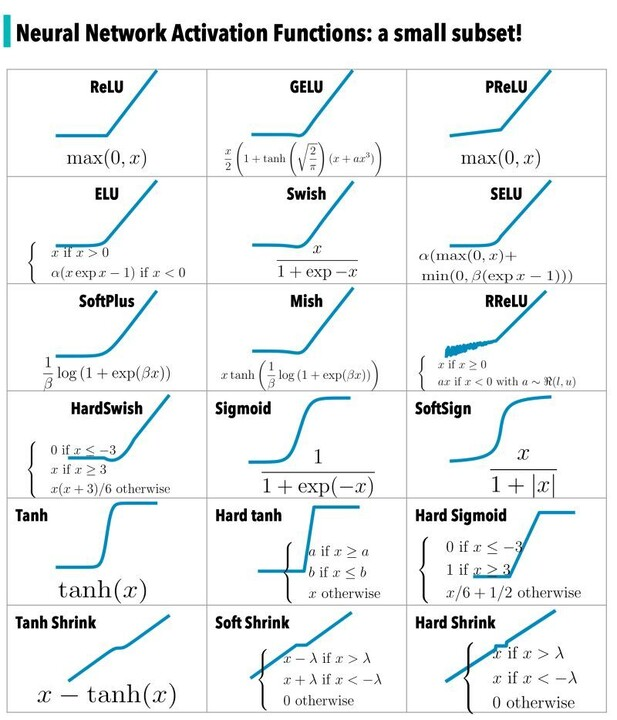

In [91]:
# keras tensor flow:
# tensors: array

#### Step 5.8.1: ANN Model Creation

In [92]:
# pip install keras

In [93]:
# pip install tensorflow

In [94]:
print('Done')

Done


In [ ]:
from keras. import Sequential
from keras.layers import Dense 
print('Done')

#### Step 5.8.2: Model Building

In [98]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

NameError: name 'Sequential' is not defined

#### Step 5.8.3: Model Traning

In [ ]:
model.fit(X_train,y_train,epochs=300)  # iteration during retraining: epochs=300

#### Step 5.8.4: pred y_value

In [ ]:
y_pred = model.predict(X_test)
y_pred = [round(i[0])for i in y_pred]
y_pred

In [97]:
ann_score = accuracy_score(y_test, y_pred)
ann_score

0.7377049180327869

# Step 6: All Model Comparison

In [95]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn']

print('Done')

Done


In [1]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

NameError: name 'plt' is not defined

# Step 7: Best Model SAVE

In [2]:
# lr has highest score so the final model is Logistic Regression

In [3]:
import pickle
with open ('heart_disease_pred.pkl','wb')as f:
    pickle.dump(model_lr,f)
print('Done')

NameError: name 'model_lr' is not defined